In [1]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb 
from neuronPOO import artificial_neuron
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

plt.style.use('dark_background')
plt.rcParams.update({
  "figure.facecolor": (0.12, 0.12, 0.12, 1),
  "axes.facecolor": (0.12, 0.12, 0.12, 1)
})

importing Jupyter notebook from neuronPOO.ipynb


## Introduction et Génération du Dataset
Dans cette section, nous générons un jeu de données simulant les caractéristiques de différentes plantes. Chaque plante est décrite par deux attributs : la largeur (x1) et la longueur (x2) de ses feuilles. Nous utilisons `make_blobs` de sklearn pour créer un Dataset de 100 instances avec ces deux caractéristiques. Notre objectif est d'entraîner un neurone artificiel pour classer les plantes en deux catégories : toxiques (y = 1) et non toxiques (y = 0).

dimensions de X: (100, 2)
dimensions de y: (100, 1)


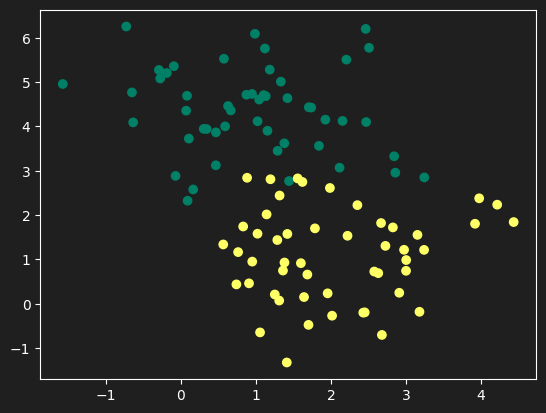

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.show()

In [3]:
model = artificial_neuron(n_iter = 1000, learning_rate = 0.01) 

model.fit(X, y)


100%|██████████| 1000/1000 [00:00<00:00, 29839.11it/s]


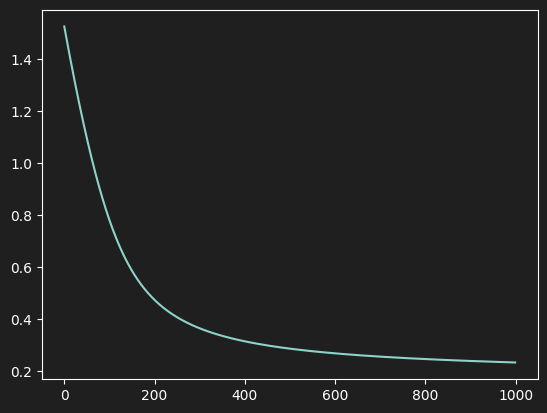

In [4]:
model.display_loss()

### Test avec une Nouvelle Instance
Ici, nous testons notre modèle avec une nouvelle instance de plante pour voir comment elle est classifiée. Cette étape est essentielle pour vérifier la capacité du modèle à généraliser ses apprentissages à de nouvelles données.

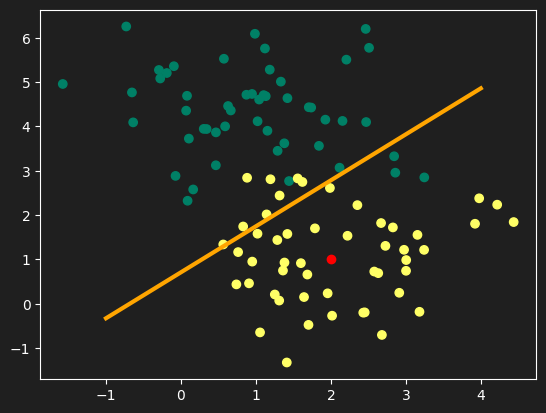

array([0.85350633])

In [9]:
new_plant = np.array([2, 1])

coef_ = model.coef_.flatten()  # Aplatir coef_ pour faciliter les manipulations
bias_ = model.bias_[0]

x0 = np.linspace(-1, 4, 100)
x1 = (-coef_[0] * x0 - bias_) / coef_[1]

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r', label="New Plant")
plt.plot(x0, x1, c='orange', lw=3)
plt.show()
model.predict(new_plant)
model.predict_proba(new_plant)
